In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%cd ..

/home/proste/mff/evgena


In [3]:
from evgena.ga.core import *
from evgena.models import Model, KerasModel
from evgena.ga.callbacks import GAStatus, BestImgReport, HistoryReport
from evgena.ga.operators import TwoPointXover, BiasedMutation, TournamentSelection
from evgena.ga.initializers import RandomStdInit
from evgena.dataset import loader

Using TensorFlow backend.
/home/proste/mff/evgena/env_evgena/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# TODO
- initializer - random noise
- xover - 2D 2 point
- mutation - gaussian? simulated annealing?
- objective - softmax value of desired output - maximizing, noise abs sum - minimizing
- selection tournament?
- ...

In [20]:
# TODO tf model objective function combined with distance (table)
class PyGAAObjectiveFnc(ObjectiveFncBase):
    def __init__(self, model: Model, target_label: int, source_image: np.ndarray):
        super(PyGAAObjectiveFnc, self).__init__()
        
        self._model = model
        self._target_label = target_label
        self._source_image = source_image
        
    def __call__(self, individuals: np.ndarray) -> np.ndarray:
        # norm of flattened individual
        norms = np.linalg.norm((individuals - self._source_image).reshape((len(individuals), -1)), axis=-1)
                               
        # logits on picture plus noise
        logits = model(np.expand_dims(individuals, -1))[:, self._target_label]
        
        # create array by merging columns
        return np.stack((logits, norms), axis=-1)

In [30]:
class PyGAAFitnessFnc(FitnessFncBase):
    def __call__(self, individuals: np.ndarray, objectives: np.ndarray) -> np.ndarray:
        return (objectives[:, 0] / objectives[:, 0].mean()) - (objectives[:, 1] / objectives[:, 1].mean())

In [7]:
graph = OperatorGraph()

In [8]:
select_op = TournamentSelection(graph.init_op, 3)
xover_op = TwoPointXover(select_op, 0.6)
mutation_op = BiasedMutation(xover_op, sigma=5, l_bound=0, u_bound=255)

In [9]:
model = KerasModel('playground/best_residual_dropout_nn_emnist_2.h5', 512)

In [10]:
(train_X, train_y), (test_X, test_y), index = loader.load_idx_dataset('datasets/emnist_balanced/')

In [ ]:
plt.imshow(train_X[15])

In [16]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e0458978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f33f92c1588>]], dtype=object)

<IPython.core.display.Javascript object>


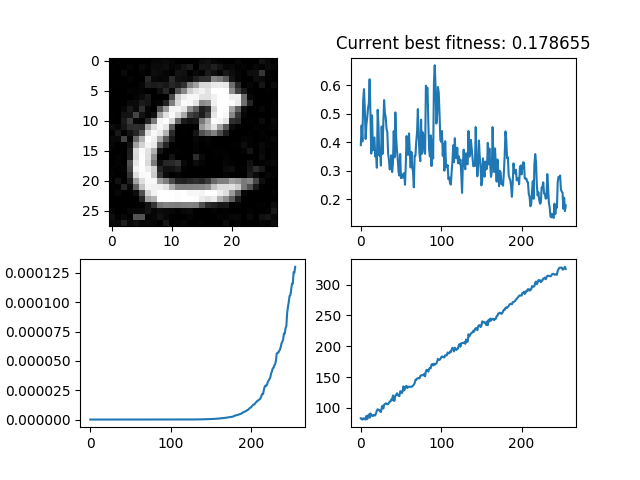

In [17]:
%matplotlib notebook

fig, ax = plt.subplots(2, 2)

callbacks = [GAStatus(fig), BestImgReport(ax[0, 0]), HistoryReport(ax[0, 1], ax[1, 0], ax[1, 1])]

In [37]:
ga = GeneticAlgorithm(
    initialization=RandomStdInit((28, 28), sigma=5, mu=train_X[15]),
    operator_graph=graph,
    objective_fnc=PyGAAObjectiveFnc(model, 32, train_X[15]),
    fitness_fnc=PyGAAFitnessFnc(),
    callbacks=callbacks
)

In [38]:
ga.run(population_size=512, generation_cap=256)

(<evgena.ga.core.Population at 0x7f33f81f32b0>,
 array([ 0.38947657,  0.45861945,  0.40240825,  0.54829997,  0.58591138,
         0.51697491,  0.41128443,  0.46258565,  0.48738666,  0.51872824,
         0.53592828,  0.62027313,  0.50093604,  0.36016797,  0.49367443,
         0.37157606,  0.41387232,  0.41636626,  0.34985304,  0.36338031,
         0.31047901,  0.5135315 ,  0.45877718,  0.35339517,  0.37684281,
         0.31803174,  0.45509416,  0.3587165 ,  0.462649  ,  0.54744015,
         0.50175871,  0.48748951,  0.44753111,  0.43519719,  0.36071778,
         0.33807614,  0.30444503,  0.31425908,  0.35400746,  0.29534252,
         0.32653848,  0.43897606,  0.34672899,  0.50429523,  0.41768516,
         0.37144633,  0.34156951,  0.29631185,  0.28321085,  0.3586279 ,
         0.27418415,  0.28647382,  0.27553773,  0.2888266 ,  0.29196641,
         0.25067727,  0.32326496,  0.42145398,  0.35634265,  0.35626511,
         0.4309181 ,  0.36128441,  0.31161733,  0.36588362,  0.313317  ,
   

In [39]:
result_pop, fit, obj = _

In [ ]:
%matplotlib notebook

plt.imshow(result_pop.individuals[result_pop.fitnesses.argmax()])

In [ ]:
result.fitnesses.argmax()

In [ ]:
result.individuals[1]

In [ ]:
index[model(train_X[15].reshape((1,28,28,1))).argmax()]

In [40]:
winner = result_pop.individuals[result_pop.fitnesses.argmax()]

In [41]:
index[model(winner.reshape((1,28,28,1))).argmax()]

['e']

In [ ]:
%matplotlib notebook

BestImgReport()

In [ ]:
# TODO composite layout - callbacks register their respective output window (or the window is assigned - axis object)